문제제기
- 이진 분류예제에 적합한 데이터셋은 17개 변수(종양의 유형, 폐활량, 호흡곤란여부,기침, 흡연, 천식 여부 등의 17가지 환자 상태), 18번째는 수술후 생존결과로 1이면 생존, 0이면 사망 폐암환자 수술 예측 데이터셋
- 17개변수를 독립변수로 보고 생존유무를 예측하는 이진 분류 문제로 정의

데이터 준비하기

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정시키기
np.random.seed(5)

#데이터 load
dataset = np.loadtxt("/content/drive/My Drive/Colab Notebooks/ThoraricSurgery.csv", delimiter=",")

dataset.shape

(470, 18)

데이터셋 생성하기 - 입력(속성값 17개)와 출력(판정결과 1개) 변수로 분리

In [ ]:
# 입력(속성값 17개)와 출력(판정결과1개) 변수 학습 데이터: 420건, 테스트 데이터: 50건→ 총 데이터 470건
x_train = dataset[:420,0:17]
y_train = dataset[:420,17]
x_test = dataset[420:,0:17]
y_test = dataset[420:,17]

모델 구성하기

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 30)                540       
_________________________________________________________________
dense_30 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


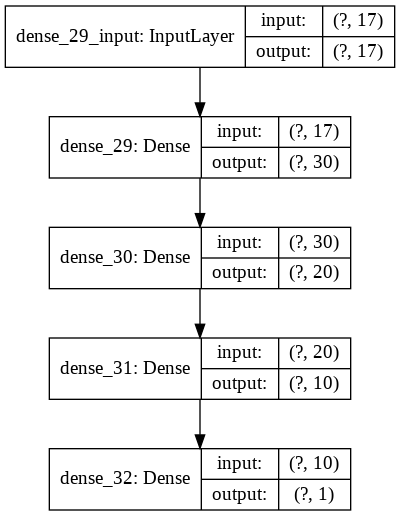

In [ ]:
# Dense 레이어만을 사용하여 다층 퍼셉트론 모델을 구성 데이터 준비하기
# 속성이 17개이기 때문에 입력뉴런을 17개이고, 퍼셉트론의 개수 30, 활성화함수 relu,
# 두번째 Dense 레이어 뉴런 퍼셉트론의 개수 20, 활성화함수relu,
# 세번째 Dense 레이어 뉴런 퍼셉트론의 개수 10, 활성화함수relu,
# 마지막 출력 Dense 레이어 이진 분류이기 때문에 0~1사이의 값을 나타내는 출력 뉴런이 1개

model = Sequential()

# 3개의 층으로 만듬
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

모델 학습과정 설정하기

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

모델 학습시키기

In [ ]:
# epochs : 전체 훈련 데이터셋에 대해 학습 반복횟수를 지정; 1500번을 반복적으로 학습
# batch_size : 가중치를 업데이트 할 배치 크기를 의미하며, 64개로 지정(700데이터 나눠서 학습)
# 64개씩 짤라서 100번 학습시키겠다.

history =  model.fit(x_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
420/420 [==============================] - 0s 304us/step - loss: 9.9286 - accuracy: 0.1429
Epoch 2/200
420/420 [==============================] - 0s 43us/step - loss: 4.9688 - accuracy: 0.1429
Epoch 3/200
420/420 [==============================] - 0s 32us/step - loss: 1.4013 - accuracy: 0.4452
Epoch 4/200
420/420 [==============================] - 0s 33us/step - loss: 0.8358 - accuracy: 0.6524
Epoch 5/200
420/420 [==============================] - 0s 29us/step - loss: 0.6488 - accuracy: 0.7595
Epoch 6/200
420/420 [==============================] - 0s 32us/step - loss: 0.5553 - accuracy: 0.7810
Epoch 7/200
420/420 [==============================] - 0s 31us/step - loss: 0.4826 - accuracy: 0.8000
Epoch 8/200
420/420 [==============================] - 0s 28us/step - loss: 0.4619 - accuracy: 0.8095
Epoch 9/200
420/420 [==============================] - 0s 29us/step - loss: 0.4522 - accuracy: 0.8143
Epoch 10/200
420/420 [==============================] - 0s 32us/step - loss: 0.43

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

학습결과 그려보기

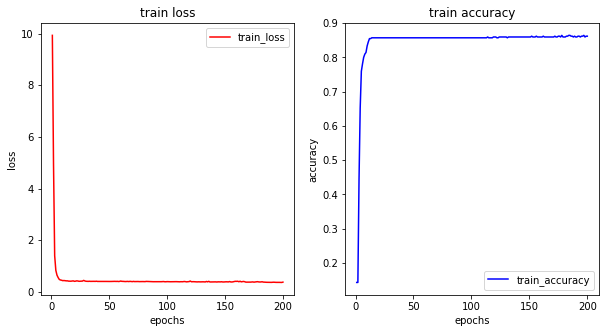

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'red', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# loss는 줄고 acc는 증가해야함

모델 평가하기

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 368us/step
accuracy: 80.00%


In [ ]:
person1 = np.array([217,2,3.24,1.88,1,0,0,0,1,0,12,0,0,0,1,0,21]).reshape(1,17)
model.predict(person1)

array([[0.3885935]], dtype=float32)

In [ ]:
person2 = np.array([464,4,3.44,2.16,1,0,0,0,1,1,12,1,0,0,1,0,57]).reshape(1,17)
model.predict(person2)


array([[0.28702465]], dtype=float32)